In [48]:
import glob
import astropy
import importlib
import math
import numpy as np

from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)

import matplotlib.pyplot as plt

# Some style for better looking plots
from pylab import rcParams
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['font.size'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 4.
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['grid.linewidth'] = 1.0
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.major.size']=8
plt.rcParams['ytick.minor.size']=4
plt.rcParams['ytick.major.size']=8
plt.rcParams['figure.figsize'] = 14,14
plt.rcParams['figure.subplot.bottom'] = 0.15
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10

In [49]:
MJD = '2020-03-05'

bias = glob.glob('./files_sorted/'+MJD+'/bias/*')
dark = glob.glob('./files_sorted/'+MJD+'/dark/*')
flat = glob.glob('./files_sorted/'+MJD+'/flat/*')
target = glob.glob('./files_sorted/'+MJD+'/ee_cep/*')
pol_std = glob.glob('./files_sorted/'+MJD+'/pol_std/*')

print("Bias:", str(len(bias))+".", 
      "Dark:", str(len(dark))+".", 
      "Flat:", str(len(flat))+".", 
      "Target:", str(len(target))+".", 
      "Polarization Standard:", str(len(pol_std))+".")

funcs_calib_and_plot.file_splits(bias)
funcs_calib_and_plot.file_splits(dark)
funcs_calib_and_plot.file_splits(flat)
funcs_calib_and_plot.file_splits(target)
funcs_calib_and_plot.file_splits(pol_std)

Bias: 50. Dark: 220. Flat: 24. Target: 180. Polarization Standard: 106.
zero {'bias'} Filters: [('SU', 50)] 
dark {'dark'} Filters: [('SU', 220)] 
flat {'flat'} Filters: [('R', 24)] 
object {'eecep'} Filters: [('P1-R', 51), ('R', 78), ('P3-R', 51)] total 30.0 min exposure time
object {'hd215806', 'g191b2b'} Filters: [('P1-R', 53), ('P3-R', 53)] total 27.0 min exposure time


In [3]:
m_biast, m_dark, m_flat = funcs_calib_and_plot.make_calib_files(bias, dark, flat)
#Where do the R bands start?

In [4]:
for i in range(0, len(target)):
    print(i, 
    astropy.io.fits.open(target[i])[0].header['TIME-OBS'],
    astropy.io.fits.open(target[i])[0].header['FILTER'],
    astropy.io.fits.open(target[i])[0].header['EXPTIME'])
    #print(i)
    #print(astropy.io.fits.open(target[i])[0].header['TIME-OBS'])
    #print(astropy.io.fits.open(target[i])[0].header['FILTER'])
    #print(astropy.io.fits.open(target[i])[0].header['EXPTIME'])

0 19:22:57.32 P1-R 15.0
1 19:23:50.03 P1-R 20.0
2 19:24:41.66 P1-R 20.0
3 19:25:33.32 P1-R 20.0
4 19:26:24.96 P1-R 20.0
5 19:27:16.56 P1-R 20.0
6 19:28:08.19 P1-R 20.0
7 19:28:59.82 P1-R 20.0
8 19:29:51.46 P1-R 20.0
9 19:30:43.11 P1-R 20.0
10 19:31:34.69 P1-R 20.0
11 19:32:26.31 P1-R 20.0
12 19:33:17.96 P1-R 20.0
13 19:34:09.59 P1-R 20.0
14 19:35:01.19 P1-R 20.0
15 19:35:52.81 P1-R 20.0
16 19:36:44.46 P1-R 20.0
17 19:37:36.10 P1-R 20.0
18 19:38:27.74 P1-R 20.0
19 19:39:19.31 P1-R 20.0
20 19:40:10.96 P1-R 20.0
21 19:41:02.59 P1-R 20.0
22 19:41:54.23 P1-R 20.0
23 19:42:45.82 P1-R 20.0
24 19:43:37.45 P1-R 20.0
25 19:44:29.10 P1-R 20.0
26 19:45:20.74 P1-R 20.0
27 19:46:12.37 P1-R 20.0
28 19:47:03.95 P1-R 20.0
29 19:47:55.58 P1-R 20.0
30 19:48:47.24 P1-R 20.0
31 19:15:44.27 P1-R 5.0
32 19:16:05.76 P1-R 5.0
33 19:16:27.28 P1-R 5.0
34 19:16:48.83 P1-R 5.0
35 19:17:10.38 P1-R 5.0
36 19:17:31.94 P1-R 5.0
37 19:17:53.50 P1-R 5.0
38 19:18:15.04 P1-R 5.0
39 19:18:36.52 P1-R 5.0
40 19:18:58.05 P1-R

In [63]:
#your pipeline is macklunky
reduced_obj = funcs_calib_and_plot.plot_double_raw_v_reduced(astropy.io.fits.open(target[31]),
                                    [512, 512, 512, 512], 
                                    (m_biast, m_dark, m_flat), 
                                    False, True, False) 

<Figure size 1008x1008 with 0 Axes>

130 peaks detected from image of size 1024 x 1024 with sigma: 7 and threshold: 3733.8316384778827
Targets within region of interest:  0


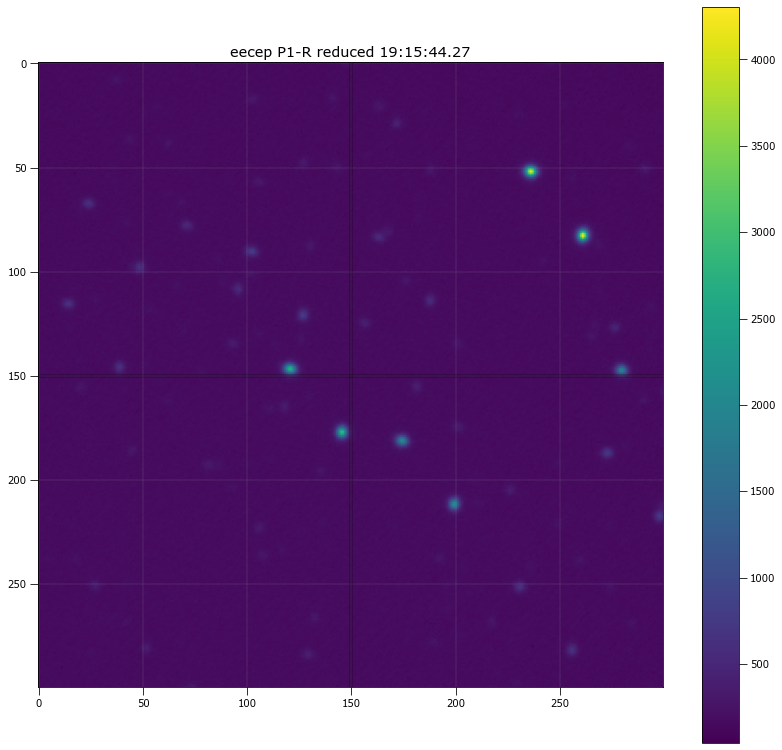

Aperture positions are: [] from the 1024 x 1024 image
Aperture positions are: [] from the 150 x 150 image


In [64]:
search_off = 150
x_targ, y_targ, peak_targ  = funcs_star_finder.source_peak_finder(reduced_obj,7, 80, 3000 , False) #what do I return from this?
apt_pos = funcs_star_finder.plot_spotted(reduced_obj, 150, x_targ, y_targ, peak_targ, False)

apt_positions = []
for h in range(0 , len(x_targ)):
    apt_positions.append((x_targ[h], y_targ[h])) #This must undergo some translation    
    
print("Aperture positions are:", apt_positions, "from the", reduced_obj[0].header['NAXIS1'], "x", reduced_obj[0].header['NAXIS2'], "image")
print("Aperture positions are:", apt_pos, "from the", str(search_off), "x", str(search_off) ,"image")

DAO found 928 objects discovered


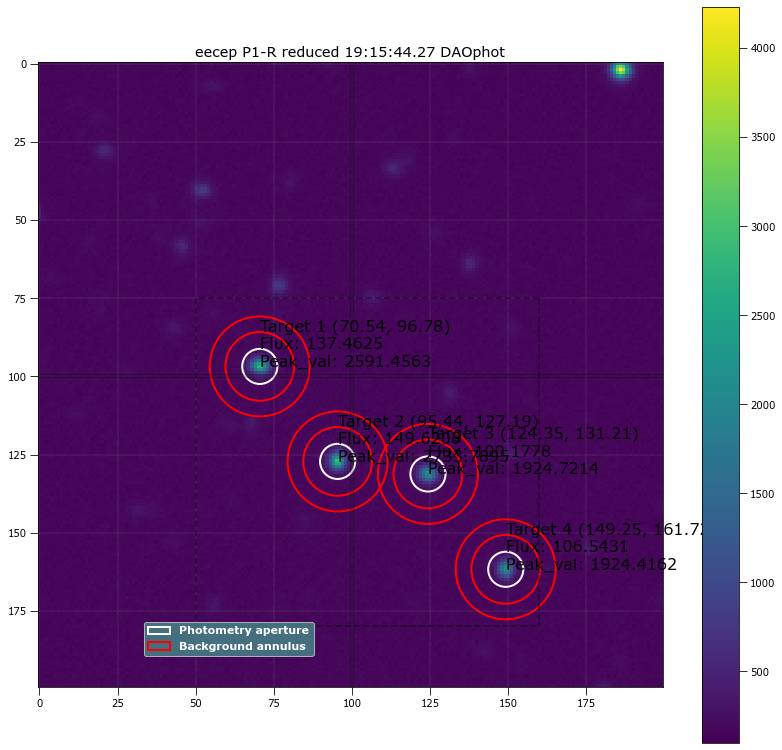

In [66]:
#DAO star finder
siegma_search = 1
DAO_positions = funcs_star_finder.dao_star_finder(reduced_obj, [25, 80, 50, 60], siegma_search , 100, 5.62, 11 , 16, True) #siegma and offset
#print("Positions of aperture from DAO",DAO_positions, "within the region of interest")
#phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, 100, DAO_positions,  5.62, 11 , 17, False  )

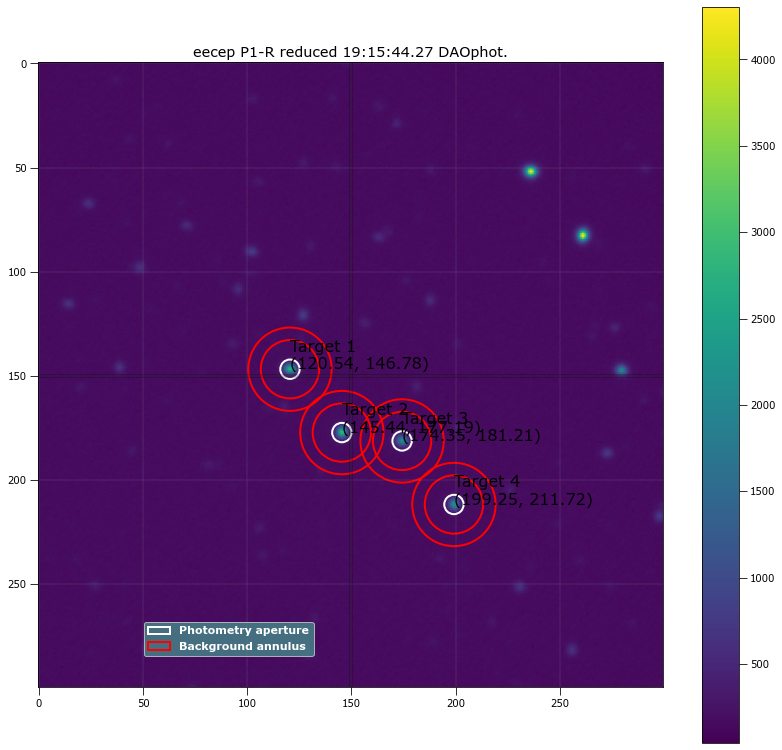

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 120.53741 146.78487 ...          982.16769      117350.48          469.74053
  2 145.44066 177.19064 ...             999.55      111429.06          442.38705
  3 174.34995 181.21195 ...          749.31222      110358.15          437.98175
  4 199.24687 211.71724 ...          751.02449      110675.16          439.42718

 Aperture are: 67.75587763887025 Annulus Area: 640.8849013323178 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 120.53741 146.78487 ...                  932.5056             54737.414
  2 145.44066 177.19064 ...                 952.77978        

In [67]:
#print(phot_tab['residual_aperture_sum'])
#reduced_obj, [25, 80, 50, 60], 7, 150, radii, 14 , 20, False

#this should be written made easy with.
#3, 7, and num are inputs

trial_radii = np.linspace(3.0, 7, num=60) #tries different radii
target_a = []
target_b = []
target_c = []
target_d = []

for radii in trial_radii:
    #Its this loop thats taking up the compute time
    DAO_positions = funcs_star_finder.dao_star_finder(reduced_obj, [25, 80, 50, 60],1, 150, radii, 14 , 20, False) 
    
    #fits_data_1, search_array, siegma, search_offset, apt_rad, ann_in_rad, ann_out_rad, plot
    
    phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, 150, DAO_positions, radii, 14 , 20, False)
    target_a.append(phot_tab['residual_aperture_sum'][0])
    target_b.append(phot_tab['residual_aperture_sum'][1])
    target_c.append(phot_tab['residual_aperture_sum'][2])
    target_d.append(phot_tab['residual_aperture_sum'][3])
    
combine_target = [target_a, target_b, target_c, target_d]
#write a function that returns target. You will have to think of an intelligent

good_radii=funcs_apt_phot.solve_apt(combine_target, trial_radii, False)

phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, 150, DAO_positions,good_radii, 14 , 20, True)

In [68]:
#i've just verified that the local background subtraction and global background subtraction are approximately the same.

In [59]:
#write an exception. If it cannot find anything. Then reduce the siegma

In [60]:
#In global background subtraction there is no annulus
phot_tab = funcs_apt_phot.apt_phot_global_bkg_sub(reduced_obj, 150, DAO_positions, good_radii, False)

TODO: Global background subtraction!
 id      xcenter            ycenter          aperture_sum     aperture_sum_err 
           pix                pix                                              
--- ------------------ ------------------ ------------------ ------------------
  1  119.5599726738948 146.64983531988568 213271.20379325436  3481.083541748948
  2 144.37114814451058 176.98815762269706 216172.37250852704  3534.133723848559
  3 173.16398339964547 180.80419717094122 160039.07107802836 2707.5525000930384
  4 198.09674070956845  211.1817567489889 157850.45795818744 2675.2151898005054


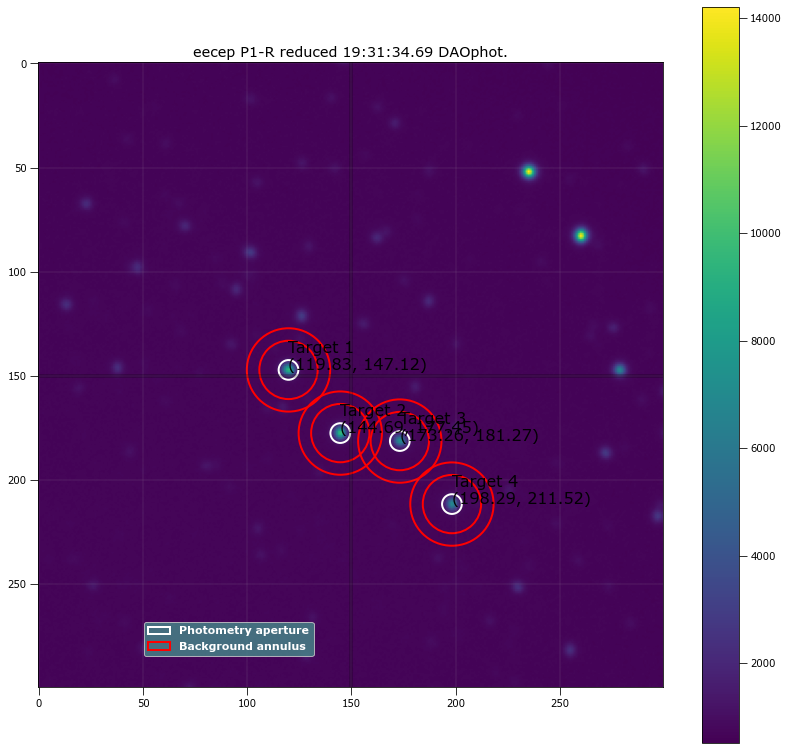

 id  xcenter   ycenter  ... aperture_sum_err_0 aperture_sum_1 aperture_sum_err_1
       pix       pix    ...                                                     
--- --------- --------- ... ------------------ -------------- ------------------
  1 119.83043 147.12103 ...          3625.0772      467239.87          1860.3266
  2 144.68616 177.44511 ...          3689.5366      445914.76          1763.4582
  3  173.2612 181.26922 ...          2757.0632      442056.22          1747.5622
  4  198.2867 211.51727 ...          2708.1509      442706.63          1750.5035

 Aperture are: 70.25128231774865 Annulus Area: 640.8849013323178 

 id  xcenter   ycenter  ... residual_aperture_sum_err residual_aperture_sum
       pix       pix    ...                                                
--- --------- --------- ... ------------------------- ---------------------
  1 119.83043 147.12103 ...                 3421.1555             209499.44
  2 144.68616 177.44511 ...                 3496.2332        

In [6]:
phot_tab = funcs_apt_phot.apt_phot_local_bkg_sub(reduced_obj, 150, DAO_positions,good_radii, 14 , 20, True)